<a href="https://colab.research.google.com/github/rajagopalmotivate/WiproMultiModalClassifierOffensive/blob/main/Multimodal_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step Pre 0: Install stuff that require restart of runtime 

In [10]:
 

!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (6,101 kB/s)
debconf: unable to initi

In [11]:
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 1s (1,840 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/D

In [59]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Step 0: Download the dataset  
download the images and 3 CSV file

In [ ]:
#images
#https://drive.google.com/drive/folders/1GGy63-KlrSLjhpbTNGV-ObS_M4JMxeLr?usp=share_link
#https://drive.google.com/drive/folders/1hKLOtpVmF45IoBmJPwojgq6XraLtHmV6


In [ ]:
#CSV 
#https://drive.google.com/drive/folders/1ckOGoRmMwCEFo-k3UX7J2lnzg495WIS5?usp=share_link


In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = 'nandriImages/'
try:
    os.makedirs(local_download_path)
except: pass

local_download_path = 'nandriCSV/'
try:
    os.makedirs(local_download_path)
except: pass


In [ ]:
!pwd

/content


In [ ]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters

 
file_list = drive.ListFile(
    {'q': "'1ckOGoRmMwCEFo-k3UX7J2lnzg495WIS5' in parents"}).GetList()  #use your own folder ID here

for f in file_list:
    # 3. Create & download by id.
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = f['title']
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)

In [3]:
# change to the folder to download to
%cd nandriImages

/content/nandriImages


In [ ]:
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters

 
file_list = drive.ListFile(
    {'q': "'1GGy63-KlrSLjhpbTNGV-ObS_M4JMxeLr' in parents"}).GetList()  #use your own folder ID here

for f in file_list:
    # 3. Create & download by id.
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = f['title']
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)

# Step 1: Understand the problem statement /  Explore dataset

## Step 1a: Understand the problem statment 

In [103]:
import pandas as pd
 

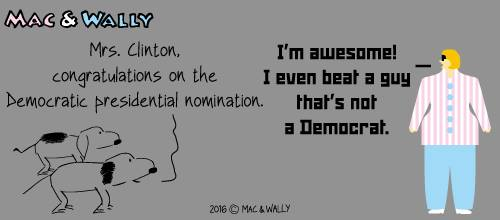

In [104]:
from PIL import Image

image1 = Image.open( dfraw['image_name'][4])
display(image1)
 

# Step 2: Extract features 


In [105]:
dfTrainingraw = pd.read_csv("/content/Testing_meme_dataset.csv")
dfTrainingraw = pd.read_csv("/content/Training_meme_dataset.csv")
dfraw = dfTrainingraw

## Step 2a. Extract image features and add to dataset 
 Apply "Declarative Feature extraction" from Visual Language Foundation models such as CLIP, VLIT, etc 
 We can extract features 

In [106]:
import cv2 
import pytesseract



In [107]:
countofRecordstoProcess  = len(dfraw )
countofRecordstoProcess = 5

In [108]:
OCR_tesseract_config = r'--psm 1'

for i in range( countofRecordstoProcess ):  
  img = cv2.imread(dfraw['image_name'][i] )
  ocrtext = pytesseract.image_to_string(img, config=OCR_tesseract_config) 
  dfraw.at[i , "OCR" ] =  ocrtext

In [109]:
dfTrainingraw

image_name                                           sentence  \
0    LJ3r8Gy.jpg.png  OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...   
1        qDnIIHA.png  2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...   
2        1JQk5NF.png                o shit waddup ! BERNIE SANDERS COM    
3          iMMNq.png  `` MITT ROMNEY IS THE WORST REPUBLICAN IN THE ...   
4        jAi3iI1.png  Anonymous ( ID : duqdA1io a 08/05/16 ( Fri ) 1...   
..               ...                                                ...   
440      a1F6RKt.png  `` I HOPE '' THE TRUMP FOUNDATION HAS N'T BROK...   
441      ZEjNdo0.png  31 6:26 PM geez . 5 minutes ago I know Bernie ...   
442      34nLFqO.png   *me , voting for Bernie Sanders Feel the Bern !    
443      gzWfYg3.png  YOU SAIOTHATAVOTEFORGARY JOHNSONWASAVOTEFOR HI...   
444      gtxLH3X.png  WeRateDogs Follow @ dog rates This is Bernie ....   

            label                                                OCR  
0    Non-offensiv  OFFICIAL BERNIE SANDERS\n\nDRINKING GAME!\n\no...  
1       offensive  oa LS WaPo\n\n \n\nTHIS IS A WALL INSIDE A NAZ...  
2       offensive                                                \n
  
3    Non-offensiv  “MITT ROMNEY 1S THE WORST REPUBLICANIIN THE\nC...  
4    Non-offensiv  ayeqap Arey\nsa duns © ssouym 0} Buyy26 a1ojaq...  
..            ...                                                ...  
440  Non-offensiv                                                NaN  
441  Non-offensiv                                                NaN  
442  Non-offensiv                                                NaN  
443     offensive                                                NaN  
444     offensive                                                NaN  

[445 rows x 4 columns]

In [110]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from transformers import ViltProcessor, ViltForImagesAndTextClassification
import requests
from PIL import Image

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-nlvr2")
model = ViltForImagesAndTextClassification.from_pretrained("dandelin/vilt-b32-finetuned-nlvr2")


In [112]:
def understnadImage(image1 , text):
  encoding = processor([image1, image1], text, return_tensors="pt")
  # forward pass
  outputs = model(input_ids=encoding.input_ids, pixel_values=encoding.pixel_values.unsqueeze(0))
  logits = outputs.logits
  idx = logits.argmax(-1).item()
  #print("Predicted answer:", model.config.id2label[idx]),
  return idx

In [113]:
from scipy.special import softmax


In [114]:
def understnadImage1(image1 , text):
  encoding = processor([image1, image1], text, return_tensors="pt")
  # forward pass
  outputs = model(input_ids=encoding.input_ids, pixel_values=encoding.pixel_values.unsqueeze(0))
  logits = outputs.logits
  idx = logits.argmax(-1).item()
  print("Predicted answer:", model.config.id2label[idx])
  scores = outputs[0][0].detach().numpy()
  scores = softmax(scores)  
  return idx, round ( scores[0] , 1)  , round ( scores[1] , 1) 

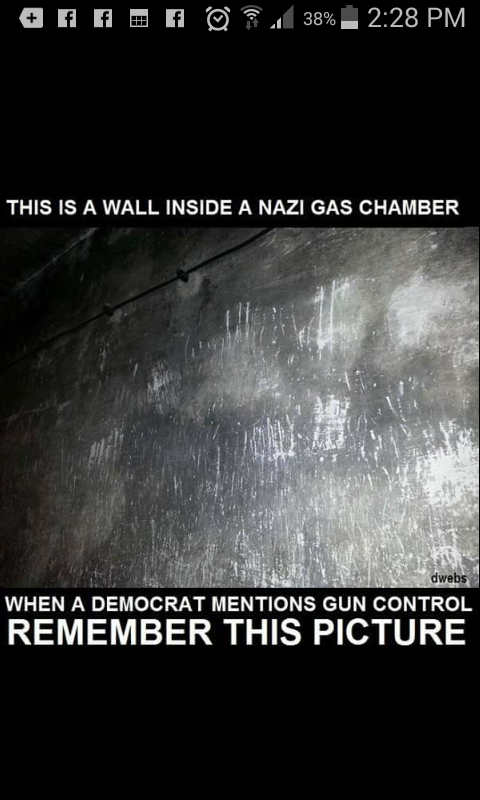

Predicted answer: True


(1, 0.2, 0.8)

In [115]:
image1 = Image.open( dfraw['image_name'][1]  )
image1 = image1.convert('RGB')
display(image1)

understnadImage1(image1 , "The image contains offensive content.")

In [116]:
for i in range( countofRecordstoProcess ):
  image1 = Image.open( dfraw['image_name'][i]  )
  image1 = image1.convert('RGB')
  isclipart = understnadImage(image1, "The image is a clipart.")
  dfraw.at[i , "isclipart" ] =  round( isclipart)
  isobscene = understnadImage(image1, "The image contains nudity or sexual content.")
  dfraw.at[i , "isImageobscene" ] =  round( isobscene)
  isOffensive = understnadImage(image1, "The image contains extremely offensive content.")
  dfraw.at[i , "isImageExtremelyOffensive" ] =  round( isOffensive)
  isOffensive = understnadImage(image1, "The image contains offensive content.")
  dfraw.at[i , "isImageOffensive" ] =  round( isOffensive)
  
 



In [117]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizerHate = AutoTokenizer.from_pretrained("elozano/tweet_offensive_eval")

classifierHate = AutoModelForSequenceClassification.from_pretrained("elozano/tweet_offensive_eval")

In [118]:
import torch

In [122]:
def isOffensiveText(text1):
  inputs = tokenizerHate(text1, return_tensors="pt")
  with torch.no_grad():
    logits = classifierHate(**inputs).logits
  predicted_class_id = logits.argmax().item()
  #print(model.config.id2label[predicted_class_id])
  return predicted_class_id

In [125]:
for i in range( countofRecordstoProcess ):  
  text1 =  dfraw['sentence'][i] 
  text1 = str(text1)
  isOffensiveTextans = isOffensiveText(text1)
  dfraw.at[i , "isOffensiveText1" ] =   isOffensiveTextans
  
  text2 =  dfraw['OCR'][i] 
  text2 = str(text2)
  isOffensiveTextans2 = isOffensiveText(text2)
  dfraw.at[i , "isOffensiveText2" ] =   isOffensiveTextans2  


In [126]:
dfraw

image_name                                           sentence  \
0    LJ3r8Gy.jpg.png  OFFICIAL BERNIE SANDERS DRINKING GAME ! Every ...   
1        qDnIIHA.png  2:28 PM THIS IS A WALL INSIDE A NAZI GAS CHAMB...   
2        1JQk5NF.png                o shit waddup ! BERNIE SANDERS COM    
3          iMMNq.png  `` MITT ROMNEY IS THE WORST REPUBLICAN IN THE ...   
4        jAi3iI1.png  Anonymous ( ID : duqdA1io a 08/05/16 ( Fri ) 1...   
..               ...                                                ...   
440      a1F6RKt.png  `` I HOPE '' THE TRUMP FOUNDATION HAS N'T BROK...   
441      ZEjNdo0.png  31 6:26 PM geez . 5 minutes ago I know Bernie ...   
442      34nLFqO.png   *me , voting for Bernie Sanders Feel the Bern !    
443      gzWfYg3.png  YOU SAIOTHATAVOTEFORGARY JOHNSONWASAVOTEFOR HI...   
444      gtxLH3X.png  WeRateDogs Follow @ dog rates This is Bernie ....   

            label                                                OCR  \
0    Non-offensiv  OFFICIAL BERNIE SANDERS\n\nDRINKING GAME!\n\no...   
1       offensive  oa LS WaPo\n\n \n\nTHIS IS A WALL INSIDE A NAZ...   
2       offensive                                                \n
   
3    Non-offensiv  “MITT ROMNEY 1S THE WORST REPUBLICANIIN THE\nC...   
4    Non-offensiv  ayeqap Arey\nsa duns © ssouym 0} Buyy26 a1ojaq...   
..            ...                                                ...   
440  Non-offensiv                                                NaN   
441  Non-offensiv                                                NaN   
442  Non-offensiv                                                NaN   
443     offensive                                                NaN   
444     offensive                                                NaN   

     isclipart  isImageobscene  isImageExtremelyOffensive  isImageOffensive  \
0          1.0             1.0                        1.0               1.0   
1          1.0             1.0                        0.0               1.0   
2          1.0             1.0                        1.0               1.0   
3          1.0             1.0                        1.0               1.0   
4          1.0             1.0                        1.0               1.0   
..         ...             ...                        ...               ...   
440        NaN             NaN                        NaN               NaN   
441        NaN             NaN                        NaN               NaN   
442        NaN             NaN                        NaN               NaN   
443        NaN             NaN                        NaN               NaN   
444        NaN             NaN                        NaN               NaN   

     isOffensiveText1  isOffensiveText2  
0                 1.0               1.0  
1                 1.0               0.0  
2                 1.0               0.0  
3                 0.0               0.0  
4                 0.0               1.0  
..                ...               ...  
440               NaN               NaN  
441               NaN               NaN  
442               NaN               NaN  
443               NaN               NaN  
444               NaN               NaN  

[445 rows x 10 columns]

In [ ]:
dfTrainingraw

In [127]:
dfTrainingraw.to_csv('processed.csv')

In [128]:
file1 = drive.CreateFile()
file1.SetContentFile('processed.csv')
file1.Upload()

In [ ]:
from google.colab import files


In [139]:
train_file_path = 'processed.csv'

dfNew = pd.read_csv(train_file_path)

del dfNew['Unnamed: 0']
del dfNew['image_name']
del dfNew['sentence']
del dfNew['OCR']

 

In [140]:
dfNew

label  isclipart  isImageobscene  isImageExtremelyOffensive  \
0    Non-offensiv        1.0             1.0                        1.0   
1       offensive        1.0             1.0                        0.0   
2       offensive        1.0             1.0                        1.0   
3    Non-offensiv        1.0             1.0                        1.0   
4    Non-offensiv        1.0             1.0                        1.0   
..            ...        ...             ...                        ...   
440  Non-offensiv        NaN             NaN                        NaN   
441  Non-offensiv        NaN             NaN                        NaN   
442  Non-offensiv        NaN             NaN                        NaN   
443     offensive        NaN             NaN                        NaN   
444     offensive        NaN             NaN                        NaN   

     isImageOffensive  isOffensiveText1  isOffensiveText2  
0                 1.0               1.0               1.0  
1                 1.0               1.0               0.0  
2                 1.0               1.0               0.0  
3                 1.0               0.0               0.0  
4                 1.0               0.0               1.0  
..                ...               ...               ...  
440               NaN               NaN               NaN  
441               NaN               NaN               NaN  
442               NaN               NaN               NaN  
443               NaN               NaN               NaN  
444               NaN               NaN               NaN  

[445 rows x 7 columns]

In [141]:
x_train = dfNew
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("label")
print(type(y_train))  # pandas.Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [142]:
x_train

isclipart  isImageobscene  isImageExtremelyOffensive  isImageOffensive  \
0          1.0             1.0                        1.0               1.0   
1          1.0             1.0                        0.0               1.0   
2          1.0             1.0                        1.0               1.0   
3          1.0             1.0                        1.0               1.0   
4          1.0             1.0                        1.0               1.0   
..         ...             ...                        ...               ...   
440        NaN             NaN                        NaN               NaN   
441        NaN             NaN                        NaN               NaN   
442        NaN             NaN                        NaN               NaN   
443        NaN             NaN                        NaN               NaN   
444        NaN             NaN                        NaN               NaN   

     isOffensiveText1  isOffensiveText2  
0                 1.0               1.0  
1                 1.0               0.0  
2                 1.0               0.0  
3                 0.0               0.0  
4                 0.0               1.0  
..                ...               ...  
440               NaN               NaN  
441               NaN               NaN  
442               NaN               NaN  
443               NaN               NaN  
444               NaN               NaN  

[445 rows x 6 columns]

In [143]:
y_train

0      Non-offensiv
1         offensive
2         offensive
3      Non-offensiv
4      Non-offensiv
           ...     
440    Non-offensiv
441    Non-offensiv
442    Non-offensiv
443       offensive
444       offensive
Name: label, Length: 445, dtype: object

In [ ]:
!pip install autokeras


In [133]:
import autokeras as ak


In [149]:
 
listofcolumnNames = list(x_train.columns.values)
listofcolumnNames

['isclipart',
 'isImageobscene',
 'isImageExtremelyOffensive',
 'isImageOffensive',
 'isOffensiveText1',
 'isOffensiveText2']

In [153]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    column_names=listofcolumnNames,
    column_types={"isclipart": "categorical", 
                  "isImageobscene": "categorical",
                  "isImageExtremelyOffensive": "categorical",  
                  "isImageOffensive": "categorical",                  
                  "isOffensiveText1": "categorical",                  
                  "isOffensiveText2": "categorical"                  
                  },
    max_trials=10,  # It tries 10 different models.
    overwrite=True,
)

In [154]:
# Feed the tensorflow Dataset to the classifier.
 
clf.fit(x_train, y_train, epochs=20)


Trial 10 Complete [00h 00m 04s]
val_accuracy: 0.4262295067310333

Best val_accuracy So Far: 0.4262295067310333
Total elapsed time: 00h 00m 47s
Epoch 1/20
14/14 [==============================] - 1s 3ms/step - loss: 0.7082 - accuracy: 0.5034
Epoch 2/20
14/14 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5775
Epoch 3/20
14/14 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.5798
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5820
Epoch 5/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5820
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5820
Epoch 7/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5820
Epoch 8/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5820
Epoch 9/20
14/14 [==============================] - 0s 3ms/step - loss: 0

In [155]:
# Export as a Keras Model.
bestmodel = clf.export_model()

In [156]:
try:
    bestmodel.save("model_autokeras", save_format="tf")
except Exception:
    bestmodel.save("model_autokeras.h5")

In [148]:
# Predict with the best model.
predicted_y = clf.predict(x_test)

# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

NameError: ignored

In [ ]:
files.download('processed.csv')

In [134]:
# It tries 10 different models.
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=3)
# Feed the structured data classifier with training data.
clf.fit(x_train, y_train, epochs=10)


Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.4262295067310333

Best val_accuracy So Far: 0.4262295067310333
Total elapsed time: 00h 00m 26s
Epoch 1/10
14/14 [==============================] - 1s 5ms/step - loss: 0.6984 - accuracy: 0.5371
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.6801 - accuracy: 0.5596
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.6732 - accuracy: 0.5888
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.6698 - accuracy: 0.5888
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.6675 - accuracy: 0.5910
Epoch 6/10
14/14 [==============================] - 0s 8ms/step - loss: 0.6656 - accuracy: 0.5843
Epoch 7/10
14/14 [==============================] - 0s 7ms/step - loss: 0.6641 - accuracy: 0.5843
Epoch 8/10
14/14 [==============================] - 0s 7ms/step - loss: 0.6629 - accuracy: 0.5910
Epoch 9/10
14/14 [==============================] - 0s 5ms/step - loss: 0.

NameError: ignored

In [ ]:
ssfsfs

In [ ]:
# prepare inputs
encoding = processor([image1, image1], text, return_tensors="pt")
# forward pass
outputs = model(input_ids=encoding.input_ids, pixel_values=encoding.pixel_values.unsqueeze(0))
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx]),

In [ ]:
idx

In [ ]:
logits

In [ ]:
logits

In [ ]:
outputs